# Assignment 1 - done by Daniel Marcon and Aurora Pia Ghiardelli

In [16]:
import numpy as np
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
np.set_printoptions(suppress=True)

# Activation functions init
Here are defined some activation functions and their derivatives, currently only sigmoid are used but for testing purposes we tried also implementing ReLU and Softmax.

In [2]:
activation_functions = {
    "sigmoid": lambda x: 1 / (1 + np.exp(-x)),
    "relu": lambda x: np.maximum(0, x),
    "softmax": lambda x: np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True),
}

activation_derivatives = {
    "sigmoid": lambda x: activation_functions["sigmoid"](x)
    * (1 - activation_functions["sigmoid"](x)),
    "relu": lambda x: np.where(x > 0, 1, 0),
    "softmax": lambda x: activation_functions["softmax"](x)
    * (1 - activation_functions["softmax"](x)),
}

## Definition of one single layer of the NN
Every layer has a matrix rappresenting the weights, a vector rappresenting the bias and an activation function. The forward function is used to calculate the output of the layer given an input, the backward function is used to calculate the gradient of the loss function with respect to the weights and the bias of the layer. The update function is used to update the weights and the bias of the layer given the gradient.

In [3]:
class Layer():
    def __init__(self, input_s: int, output_s: int, activation: str):
        self.weights = np.random.randn(input_s, output_s) * np.sqrt(1. / input_s)
        self.biases = np.zeros((1, output_s))
        self.activation = activation

    def forward(self, x):
        x = x.reshape(1, self.weights.shape[0])
        self.input = x
        self.linear_output = np.dot(x, self.weights) + self.biases
        self.layer_output = activation_functions[self.activation](self.linear_output)
        return self.layer_output

    def backward(self, dA):
        activation_derivative = activation_derivatives[self.activation]
        dZ = dA * activation_derivative(self.layer_output)
        dW = np.dot(self.input.T, dZ) / self.input.shape[0]
        db = np.sum(dZ, axis=0, keepdims=True) / self.input.shape[0]
        dA_prev = np.dot(dZ, self.weights.T)

        self.dW = dW
        self.db = db

        return dA_prev

    def update(self, learning_rate):
        self.weights -= learning_rate * self.dW
        self.biases -= learning_rate * self.db

## Definition of the Neural Network
The nn cointains a list of Layers and has a parameter to set the learning rate.
It invokes the forward, backward and update functions of every Layer. It also inclueds a method to train the network.

In [4]:
class NN():
    def __init__(self, layers: list, lr: float = 0.01):
        self.layers = layers
        self.learning_rate = lr

    # Forward pass
    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    # Backward pass
    def backward(self, dA):
        for layer in reversed(self.layers):
            dA = layer.backward(dA)

    # Update weights and biases
    def update(self):
        for layer in self.layers:
            layer.update(self.learning_rate)

    def __call__(self, x):
        return self.forward(x)

    # Trains the model, X is the input data which in this case is also used as the target    
    def train(self, X, epochs):
        for epoch in range(epochs):
            loss = []
            for x in X:
                y_hat = self.forward(x)
                error = y_hat - x
                loss.append(np.sum((error) ** 2))
                
                self.backward(error)
                self.update()
                
            loss = np.mean(loss)

            if epoch % (epochs / 10) == 0:
                print(f"Epoch {epoch} - Loss: {loss}")


# Preparing the data and training the network

In [5]:
# Data
X = np.eye(8)

# Variable to set the size of the hidden layer
HIDDENT_LAYER_SIZE = 3

layers = [
    Layer(8, HIDDENT_LAYER_SIZE, "sigmoid"),
    Layer(HIDDENT_LAYER_SIZE, 8, "sigmoid"),
]

nn = NN(layers = layers, lr = 0.2)
nn.train(X, 10000)

Epoch 0 - Loss: 1.716961070071439
Epoch 1000 - Loss: 0.14427103033022026
Epoch 2000 - Loss: 0.09796534340643209
Epoch 3000 - Loss: 0.07302802801901134
Epoch 4000 - Loss: 0.05310799243427378
Epoch 5000 - Loss: 0.03820422270295609
Epoch 6000 - Loss: 0.027820842281425832
Epoch 7000 - Loss: 0.020709993425841563
Epoch 8000 - Loss: 0.015855199935970777
Epoch 9000 - Loss: 0.012449082191792782


# Testing the trained network

In [6]:
for i in range(8):
    pprint(np.round(nn(X[i])[0]))   

array([1., 0., 0., 0., 0., 0., 0., 0.])
array([0., 1., 0., 0., 0., 0., 0., 0.])
array([0., 0., 1., 0., 0., 0., 0., 0.])
array([0., 0., 0., 1., 0., 0., 0., 0.])
array([0., 0., 0., 0., 1., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0., 0.])
array([0., 0., 0., 0., 0., 0., 1., 0.])
array([0., 0., 0., 0., 0., 0., 0., 1.])


# Taking a look at the model

In [7]:
nn.layers[0].weights

array([[  -6.08395087,   57.62868629,   72.56920107],
       [  30.6223915 ,    2.51252879,   71.90898771],
       [  25.7701028 ,   58.40240781,   69.81329749],
       [  29.88703614,  -50.29555117,  -65.29651023],
       [-110.59811924,   56.31445101, -376.83829053],
       [ -31.27051709, -264.1648892 ,   70.29798704],
       [   2.758234  ,   23.38140038,   72.45414532],
       [  30.83036485,   57.51691496,   12.77492939]])

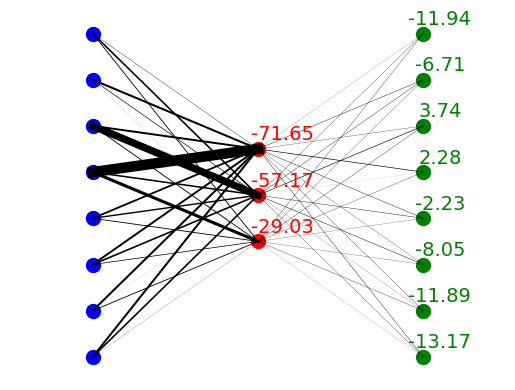

In [8]:
import matplotlib.pyplot as plt

# Define the positions of the neurons in the input, hidden, and output layers
input_layer_pos = [(0, i) for i in range(8)]
hidden_layer_pos = [(1, i + 2.5) for i in range(HIDDENT_LAYER_SIZE)]
output_layer_pos = [(2, i) for i in range(8)]

fig, ax = plt.subplots()

# Plot the neurons
for pos in input_layer_pos:
    ax.plot(pos[0], pos[1], 'bo', markersize=10)
for pos in hidden_layer_pos:
    ax.plot(pos[0], pos[1], 'ro', markersize=10)
for pos in output_layer_pos:
    ax.plot(pos[0], pos[1], 'go', markersize=10)

# Plot the weights as lines with varying thickness for the first layer
for i, input_pos in enumerate(input_layer_pos):
    for j, hidden_pos in enumerate(hidden_layer_pos):
        weight = nn.layers[0].weights[i, j]
        ax.plot([input_pos[0], hidden_pos[0]], [input_pos[1], hidden_pos[1]], 'k-', lw=abs(weight) / 50)

# Plot the weights as lines with varying thickness for the second layer
for i, hidden_pos in enumerate(hidden_layer_pos):
    for j, output_pos in enumerate(output_layer_pos):
        weight = nn.layers[1].weights[i, j]
        ax.plot([hidden_pos[0], output_pos[0]], [hidden_pos[1], output_pos[1]], 'k-', lw=abs(weight) / 50)

# Annotate the biases
for i, hidden_pos in enumerate(hidden_layer_pos):
    bias = nn.layers[0].biases[0, i]
    ax.text(hidden_pos[0] + 0.15, hidden_pos[1] + 0.2, f'{bias:.2f}', color='red', fontsize=14, ha='center')
for i, output_pos in enumerate(output_layer_pos):
    bias = nn.layers[1].biases[0, i]
    ax.text(output_pos[0] + 0.1, output_pos[1] + 0.2, f'{bias:.2f}', color='green', fontsize=14, ha='center')

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 7.5)
ax.axis('off')
plt.show()

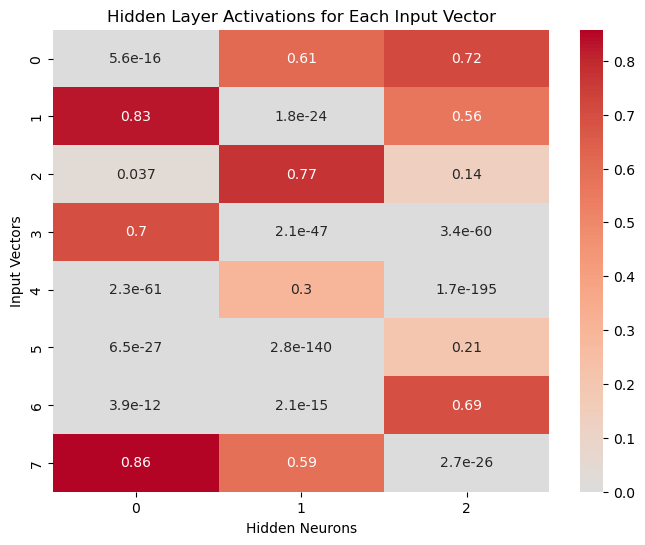

In [19]:
hidden_activations = []
for i in range(8):
    hidden_value = nn.layers[0].forward(X[i])
    hidden_activations.append(hidden_value)

hidden_activations = np.array(hidden_activations).reshape(8, HIDDENT_LAYER_SIZE)

plt.figure(figsize=(8, 6))
sns.heatmap(hidden_activations, annot=True, cmap="coolwarm", cbar=True, center=0)
plt.xlabel("Hidden Neurons")
plt.ylabel("Input Vectors")
plt.title("Hidden Layer Activations for Each Input Vector")
plt.show()